# Data Science Assignment - Web3 Trading Team
### Notebook 1 - Main Analysis
**Candidate:** Sparshi Jain

This notebook follows the standardized submission format as per instructions.

**Sections:**
1. Import Libraries
2. Load Datasets
3. Exploratory Data Analysis (EDA)
4. Data Cleaning & Merging
5. Analysis & Visualizations
6. Save Outputs
7. Summary of Insights

## 1. Import Libraries

## 2. Load Datasets

## 3. Exploratory Data Analysis (EDA)

## 4. Data Cleaning & Merging

## 5. Analysis & Visualizations

## 6. Save Outputs

## 7. Summary of Insights

Merged DataFrame preview:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   Closed PnL                                   Transaction Hash  

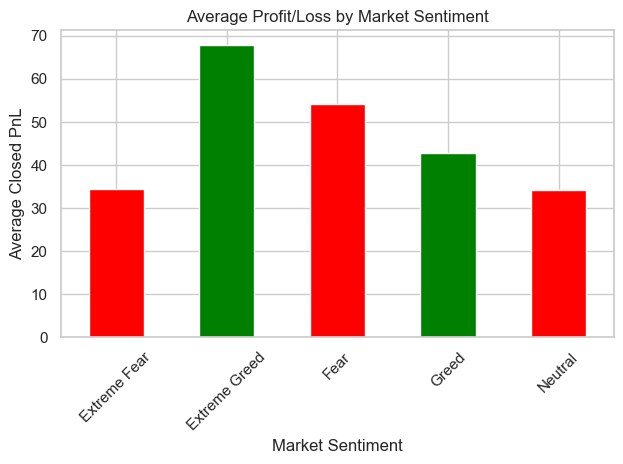

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ================================
# 1. Load datasets
# ================================
trader_df = pd.read_csv(r"C:\Users\91706\OneDrive\Desktop\stock any\historical_data.csv")
sentiment_df = pd.read_csv(r"C:\Users\91706\OneDrive\Desktop\stock any\fear_greed_index.csv")

# ================================
# 2. Clean column names (remove spaces)
# ================================
trader_df.columns = trader_df.columns.str.strip()
sentiment_df.columns = sentiment_df.columns.str.strip()

# ================================
# 3. Convert date columns
# ================================
# Convert Timestamp IST to datetime
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')
# Extract only the date part
trader_df['date'] = trader_df['Timestamp IST'].dt.date

# Convert sentiment date column to datetime.date type
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce').dt.date

# ================================
# 4. Merge datasets
# ================================
merged_df = pd.merge(trader_df, sentiment_df, on='date', how='left')

print("Merged DataFrame preview:")
print(merged_df.head())

# ================================
# 5. Calculate average PnL by sentiment
# ================================
avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean()
print("\nAverage PnL by Market Sentiment:")
print(avg_pnl)

# ================================
# 6. Save folders for outputs
# ================================
Path("outputs").mkdir(exist_ok=True)
Path("csv_files").mkdir(exist_ok=True)

# Save merged data
merged_df.to_csv("csv_files/merged_data.csv", index=False)

# ================================
# 7. Plot Average PnL by Market Sentiment
# ================================
avg_pnl.plot(kind='bar', color=['red', 'green'])
plt.title('Average Profit/Loss by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.xticks(rotation=45)
plt.tight_layout()

# Save and show plot
plt.savefig("outputs/avg_pnl_by_sentiment.png")
plt.show()
